# Surface Position Optimization - Examples

Following we show a few examples on how to use the optimizer for the surface position in PVGIS.

## Programmatic preamble

In [99]:
from pvgisprototype import (TemperatureSeries, WindSpeedSeries, SpectralFactorSeries, LinkeTurbidityFactor,
                             Longitude, Latitude, Elevation, SurfaceOrientation, SurfaceTilt,
                            )
from pvgisprototype.api.power.photovoltaic_module import PhotovoltaicModuleModel
from pvgisprototype.api.datetime.datetimeindex import generate_datetime_series
from zoneinfo import ZoneInfo
from pvgisprototype.api.surface.graph_power_output import graph_power_output
from pvgisprototype.api.surface.optimize_angles import optimize_angles
from pvgisprototype.api.surface.parameter_models import (SurfacePositionOptimizerMethod, 
                                                        SurfacePositionOptimizerMode)
import math
from pvgisprototype.constants import DEGREES

## Data preparation

First, we define some basic parameters for a location, in which case it is a solar panel located behind the ESTI Lab, in the JRC, European Commission.

In [100]:

latitude = Latitude(value=45.812, unit=DEGREES)
longitude = Longitude(value=8.628, unit=DEGREES)
elevation = 214
timezone = ZoneInfo("UTC")
spectral_factor_series = SpectralFactorSeries(value=1)
photovoltaic_module = PhotovoltaicModuleModel.CIS_FREE_STANDING
temperature_series = TemperatureSeries(value=12)
wind_speed_series = WindSpeedSeries(value=2)
linke_turbidity_factor_series = LinkeTurbidityFactor(value=1)

### First Example - 1 Day - Tilt Optimization

For this first example, we will optimize the tilt of the panel on the 1st January 2010. We define the dates, the optimization mode as "Tilt", and the surface orientation of our panel

In [101]:
start_time = '2010-01-01'
end_time = '2010-01-02'
timestamps = generate_datetime_series(start_time=start_time, end_time=end_time, frequency="h")
mode = SurfacePositionOptimizerMode.Tilt
surface_orientation = math.radians(180)

Now, we call the `optimize_angles()` function to calculate which is the optimal tilt for this case

In [102]:
result = optimize_angles(longitude = longitude,
                latitude = latitude,
                elevation = elevation, 
                timestamps = timestamps,
                timezone = timezone,
                spectral_factor_series = spectral_factor_series,
                photovoltaic_module = photovoltaic_module,
                temperature_series = temperature_series,
                wind_speed_series = wind_speed_series,
                linke_turbidity_factor_series = linke_turbidity_factor_series,
                mode = mode,
                surface_orientation = surface_orientation
                )
print(result)

{'surface_orientation': SurfaceOrientation(value=3.141592653589793, unit='radians', min_radians=0, max_radians=6.283185307179586, min_degrees=0, max_degrees=360, optimal=False, optimizer=None), 'surface_tilt': SurfaceTilt(value=1.3010681179913646, unit='radians', min_radians=0, max_radians=1.5707963267948966, min_degrees=0, max_degrees=90, optimal=True, optimizer='SHGO'), 'mean_power_output': 232.95601}


And now let's plot the PV Power Output and the point where the maximum PV Output is generated

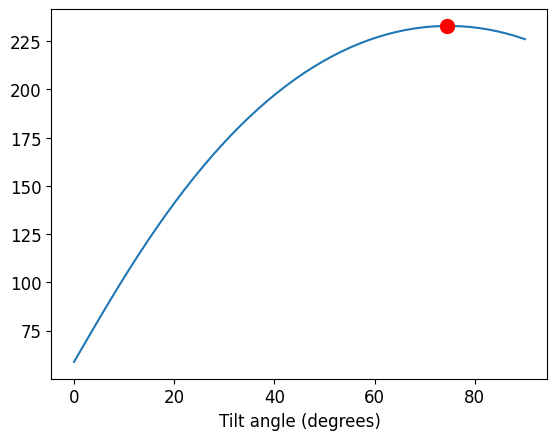

In [103]:

graph_power_output(longitude = longitude,
                latitude = latitude,
                elevation = elevation, 
                timestamps = timestamps,
                timezone = timezone,
                spectral_factor_series = spectral_factor_series,
                photovoltaic_module = photovoltaic_module,
                temperature_series = temperature_series,
                wind_speed_series = wind_speed_series,
                linke_turbidity_factor_series = linke_turbidity_factor_series,
                mode = mode,
                surface_orientation = SurfaceOrientation(value=(surface_orientation), unit='radians'),
                optimal_surface_tilt = result['surface_tilt'].value,
                optimal_pv_power = result['mean_power_output'] 
                )

### Second Example - 1 Year - Tilt Optimization

For this second example, we will optimize the tilt of the panel on 2010, considering the same orientation as before. Let's define the new timestamps.

In [104]:
start_time = '2010-01-01'
end_time = '2010-12-31'
timestamps = generate_datetime_series(start_time=start_time, end_time=end_time, frequency="h")

We run the optimizer

In [105]:
result = optimize_angles(longitude = longitude,
                latitude = latitude,
                elevation = elevation, 
                timestamps = timestamps,
                timezone = timezone,
                spectral_factor_series = spectral_factor_series,
                photovoltaic_module = photovoltaic_module,
                temperature_series = temperature_series,
                wind_speed_series = wind_speed_series,
                linke_turbidity_factor_series = linke_turbidity_factor_series,
                mode = mode,
                surface_orientation = surface_orientation
                )
print(result)

{'surface_orientation': SurfaceOrientation(value=3.141592653589793, unit='radians', min_radians=0, max_radians=6.283185307179586, min_degrees=0, max_degrees=360, optimal=False, optimizer=None), 'surface_tilt': SurfaceTilt(value=0.7731263170943632, unit='radians', min_radians=0, max_radians=1.5707963267948966, min_degrees=0, max_degrees=90, optimal=True, optimizer='SHGO'), 'mean_power_output': 263.3732}


And now we plot the PV Power

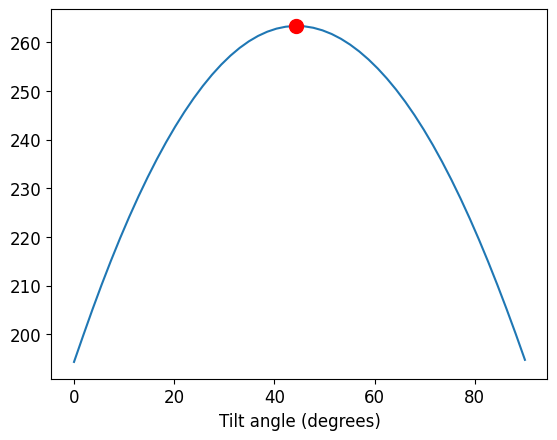

In [106]:

graph_power_output(longitude = longitude,
                latitude = latitude,
                elevation = elevation, 
                timestamps = timestamps,
                timezone = timezone,
                spectral_factor_series = spectral_factor_series,
                photovoltaic_module = photovoltaic_module,
                temperature_series = temperature_series,
                wind_speed_series = wind_speed_series,
                linke_turbidity_factor_series = linke_turbidity_factor_series,
                mode = mode,
                surface_orientation = SurfaceOrientation(value=(surface_orientation), unit='radians'),
                optimal_surface_tilt = result['surface_tilt'].value,
                optimal_pv_power = result['mean_power_output'] 
                )

### Third Example - 15 Year - Tilt and Orientation Optimization

In this last example, we will optimize the tilt and orientation of the panel from 2005 to 2010. Let's define the new timestamps, and change our mode to "Tilt and Orientation"

In [107]:
start_time = '2005-01-01'
end_time = '2020-01-01'
timestamps = generate_datetime_series(start_time=start_time, end_time=end_time, frequency="h")
mode = SurfacePositionOptimizerMode.Tilt_and_Orientation

In [108]:
result = optimize_angles(longitude = longitude,
                latitude = latitude,
                elevation = elevation, 
                timestamps = timestamps,
                timezone = timezone,
                spectral_factor_series = spectral_factor_series,
                photovoltaic_module = photovoltaic_module,
                temperature_series = temperature_series,
                wind_speed_series = wind_speed_series,
                linke_turbidity_factor_series = linke_turbidity_factor_series,
                mode = mode,
                )

print(result)

{'surface_orientation': SurfaceOrientation(value=3.141592653589793, unit='radians', min_radians=0, max_radians=6.283185307179586, min_degrees=0, max_degrees=360, optimal=True, optimizer='SHGO'), 'surface_tilt': SurfaceTilt(value=0.7853981633974483, unit='radians', min_radians=0, max_radians=1.5707963267948966, min_degrees=0, max_degrees=90, optimal=True, optimizer='SHGO'), 'mean_power_output': 263.25497}


In [109]:
graph_power_output(longitude = longitude,
                latitude = latitude,
                elevation = elevation, 
                timestamps = timestamps,
                timezone = timezone,
                spectral_factor_series = spectral_factor_series,
                photovoltaic_module = photovoltaic_module,
                temperature_series = temperature_series,
                wind_speed_series = wind_speed_series,
                linke_turbidity_factor_series = linke_turbidity_factor_series,
                mode = mode,
                optimal_surface_tilt = result['surface_tilt'].value,
                optimal_surface_orientation= result['surface_orientation'].value,
                optimal_pv_power = result['mean_power_output'] 
                )

TypeError: '<=' not supported between instances of 'SurfaceTilt' and 'float'